# Churn within Telecom

The stakeholder, SyriaTel, is a telecommunications company whose goal is to better understand what factors are causing customer churn. Due to limits on data size, the model will only be robust enough to be used by SyriaTel to analyze their specific data provided.

Business Problem

* Classsification: Can we classify or predict customer who will churn?
* Identification: Can we identify reason(s) for customer Churn?
* Retention: What effective measures can we use to reatin customers?

In [1]:
# load required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Loading

In [2]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
# Dataset is now stored in a Pandas Dataframe

In [3]:
#checking the data loaded properly
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [4]:
#checking the first row
df.iloc[0]

state                           KS
account length                 128
area code                      415
phone number              382-4657
international plan              no
voice mail plan                yes
number vmail messages           25
total day minutes            265.1
total day calls                110
total day charge             45.07
total eve minutes            197.4
total eve calls                 99
total eve charge             16.78
total night minutes          244.7
total night calls               91
total night charge           11.01
total intl minutes              10
total intl calls                 3
total intl charge              2.7
customer service calls           1
churn                        False
Name: 0, dtype: object

In [5]:
#checking the data types/structures we're going to be working with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
# area code should not be an int. Lets change the data type to object
df['area code'] = df['area code'].astype('object')

In [7]:
df.dtypes

state                      object
account length              int64
area code                  object
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [8]:
#Get basic stats for numeric data
df.describe()

account length  number vmail messages  total day minutes  \
count     3333.000000            3333.000000        3333.000000   
mean       101.064806               8.099010         179.775098   
std         39.822106              13.688365          54.467389   
min          1.000000               0.000000           0.000000   
25%         74.000000               0.000000         143.700000   
50%        101.000000               0.000000         179.400000   
75%        127.000000              20.000000         216.400000   
max        243.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

We can see that the average length of the account is 101 months and min is one month

In [9]:
#Object features are not present in the describe stat. lets include them
df.describe(include=['object','bool'])

state  area code phone number international plan voice mail plan  churn
count   3333       3333         3333               3333            3333   3333
unique    51          3         3333                  2               2      2
top       WV        415     395-3852                 no              no  False
freq     106       1655            1               3010            2411   2850

Checking on the object/categorical features, phone number may not be useful. This will be addressed in a later time when do EDA for categorical variables. 

In [10]:
#Check for null values in each column
df.isnull().any()

state                     False
account length            False
area code                 False
phone number              False
international plan        False
voice mail plan           False
number vmail messages     False
total day minutes         False
total day calls           False
total day charge          False
total eve minutes         False
total eve calls           False
total eve charge          False
total night minutes       False
total night calls         False
total night charge        False
total intl minutes        False
total intl calls          False
total intl charge         False
customer service calls    False
churn                     False
dtype: bool

In [11]:
#Sum null values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values, however, we may need to investigate further to determine if any extreme values need to be addressed.

In [12]:
#Display number of unique values in a column
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

# Target (Churn)

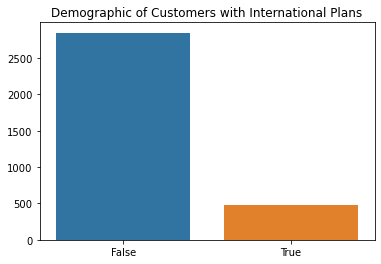

In [13]:
# Lets visualiza our target variable
import matplotlib.pyplot as plt
import seaborn as sns 
churn = df['churn'].value_counts()
sns.barplot(churn.index, churn.values).set_title('Demographic of Customers with International Plans')
plt.savefig('Target_bar')

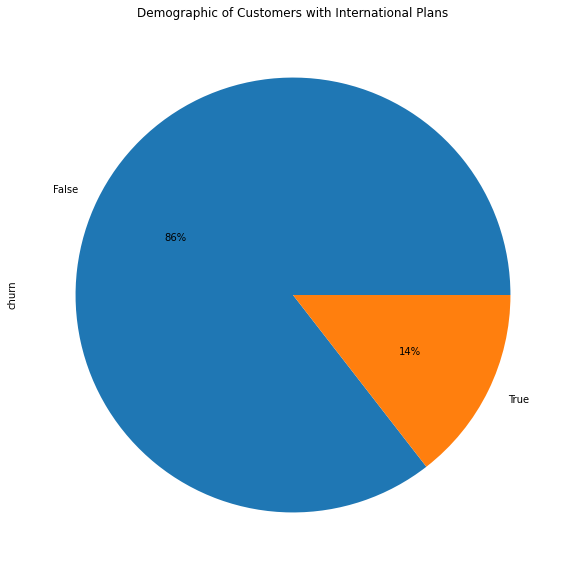

In [14]:
df['churn'].value_counts().plot.pie(y='Churn', figsize=(10, 10), autopct='%1.0f%%').set_title('Demographic of Customers with International Plans')
plt.savefig('Target_pie')

In [15]:
#Display the count of unique values for churn column
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [16]:
# Relative frequency of the values in Churn column. 85.5% have not churned. 14.5% churned
df['churn'].value_counts(normalize =True)*100

False    85.508551
True     14.491449
Name: churn, dtype: float64

In [17]:
churn_perc = df["churn"].sum() * 100 / df["churn"].shape[0]
print("Churn rate is %.3f%%." % churn_perc)

Churn rate is 14.491%.


In [18]:
df.shape

(3333, 21)

 Exploration of the target with around 14% being customers who have churn. The churn rate is not high, however, we need to explore which features influnce churn and possibly retention.

# Categorical 

In [19]:
# dealing with categorical columns 
categorical = df.select_dtypes('object')
categorical.head()

state area code phone number international plan voice mail plan
0    KS       415     382-4657                 no             yes
1    OH       415     371-7191                 no             yes
2    NJ       415     358-1921                 no              no
3    OH       408     375-9999                yes              no
4    OK       415     330-6626                yes              no

Looking into the object/categorical feature, phone number may not be useful. 

In [20]:
# checking the number of values in 'international_plan' columns
df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

Text(0.5, 1.0, 'Demographic of Customers with International Plans')

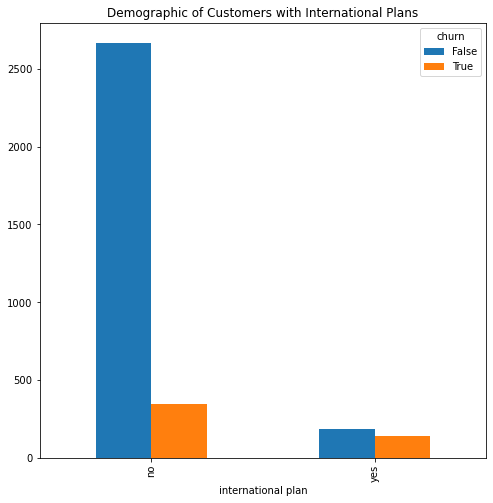

In [21]:
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=False, figsize=(8,8)).set_title('Demographic of Customers with International Plans') 



In [22]:
# checking the values in voicemail plan
df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

Text(0.5, 1.0, 'Demographic of Customers with Voice Mail Plans')

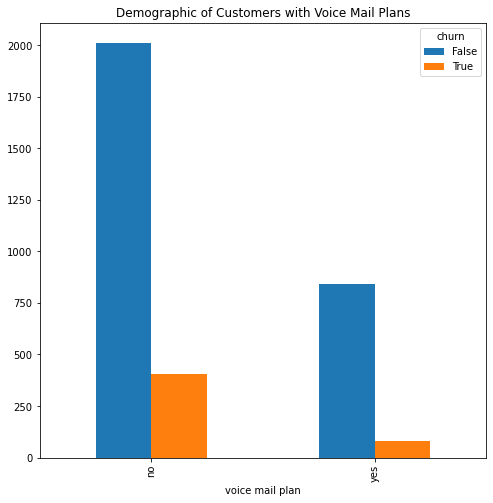

In [23]:
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=False, figsize=(8,8)).set_title('Demographic of Customers with Voice Mail Plans') 

As we can see although a large number of custers have stayed who do not have a voice mail plan. Yet, looking at customers who do have a voice mail plan we can say there is a relationship to retention when having a voice mail plan.

In [24]:
# checking the shape of state, to see if DC or PR is represented
df['state'].nunique()

51

In [25]:
#Lets see unique values in 'state' column
df.state.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

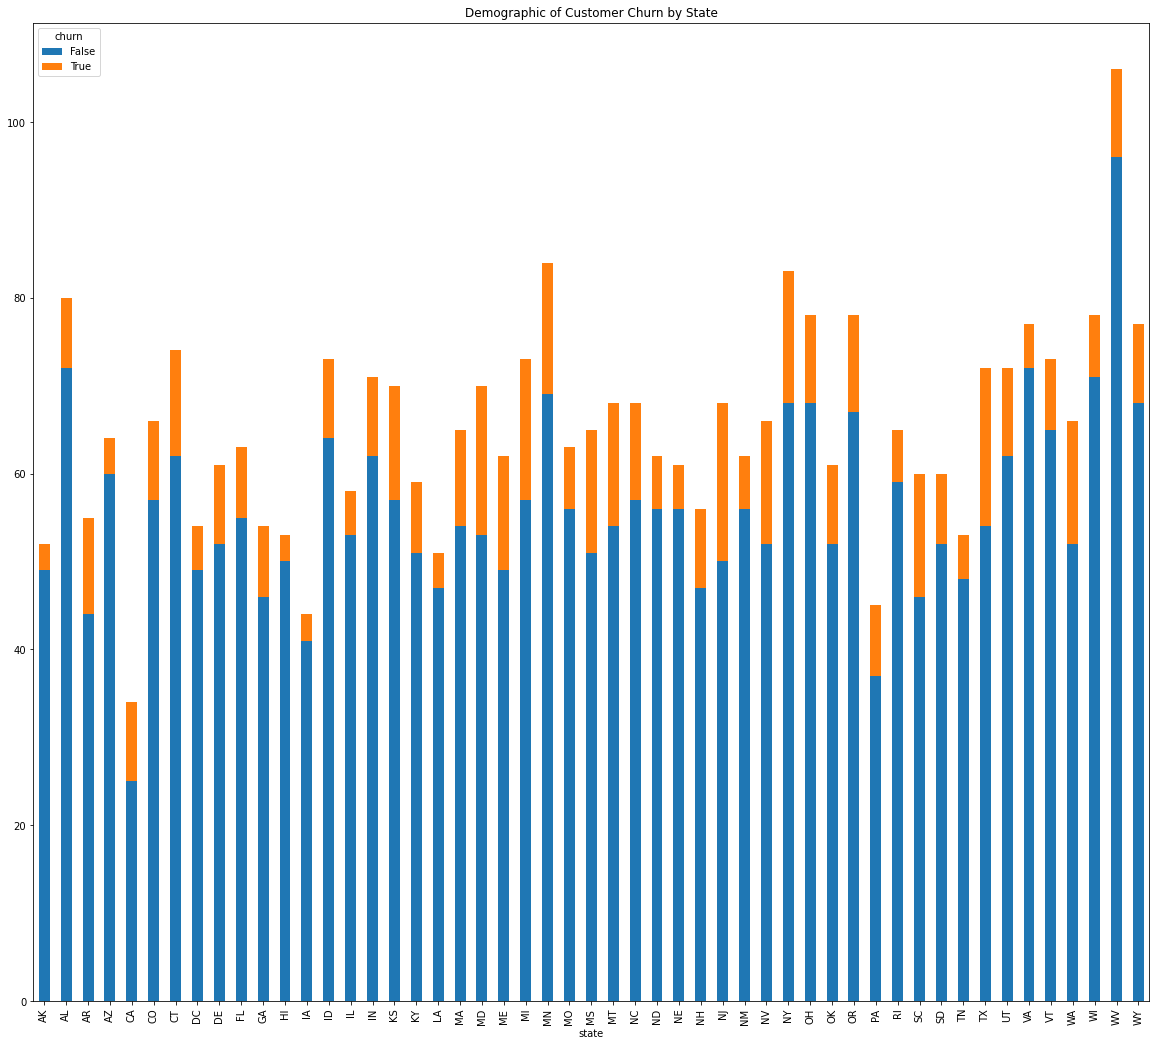

In [26]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,18)).set_title('Demographic of Customer Churn by State')

plt.savefig('State')

In [27]:
# lets drop phone number columns
df = df.drop(['phone number'], axis = 1)


In [28]:
df.select_dtypes('object').head()

state area code international plan voice mail plan
0    KS       415                 no             yes
1    OH       415                 no             yes
2    NJ       415                 no              no
3    OH       408                yes              no
4    OK       415                yes              no

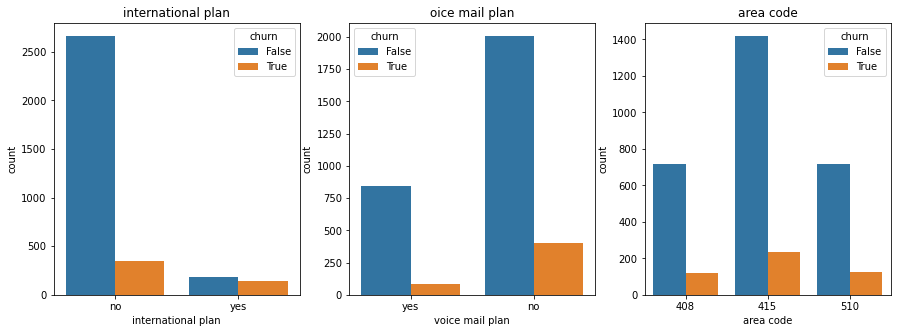

In [29]:
##a comprehensive view of demographics of categorical variables to our target

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='international plan', hue='churn', data=df, ax=axs[0])
axs[0].set_title('international plan')
sns.countplot(x='voice mail plan', hue='churn', data=df, ax=axs[1])
axs[1].set_title('oice mail plan')
sns.countplot(x='area code', hue='churn', data=df, ax=axs[2])
axs[2].set_title('area code')
plt.savefig('categorical')

# Continous 

In [30]:
# dealing with continous columns 
continous = df.select_dtypes('number').head()
continous

account length  number vmail messages  total day minutes  total day calls  \
0             128                     25              265.1              110   
1             107                     26              161.6              123   
2             137                      0              243.4              114   
3              84                      0              299.4               71   
4              75                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  
0                       1  
1                       1  
2                       0  
3                       2  
4                       3

In [31]:
continous.columns

Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls'],
      dtype='object')

In [32]:
#Get basic stats for numeric data
df.describe()

account length  number vmail messages  total day minutes  \
count     3333.000000            3333.000000        3333.000000   
mean       101.064806               8.099010         179.775098   
std         39.822106              13.688365          54.467389   
min          1.000000               0.000000           0.000000   
25%         74.000000               0.000000         143.700000   
50%        101.000000               0.000000         179.400000   
75%        127.000000              20.000000         216.400000   
max        243.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

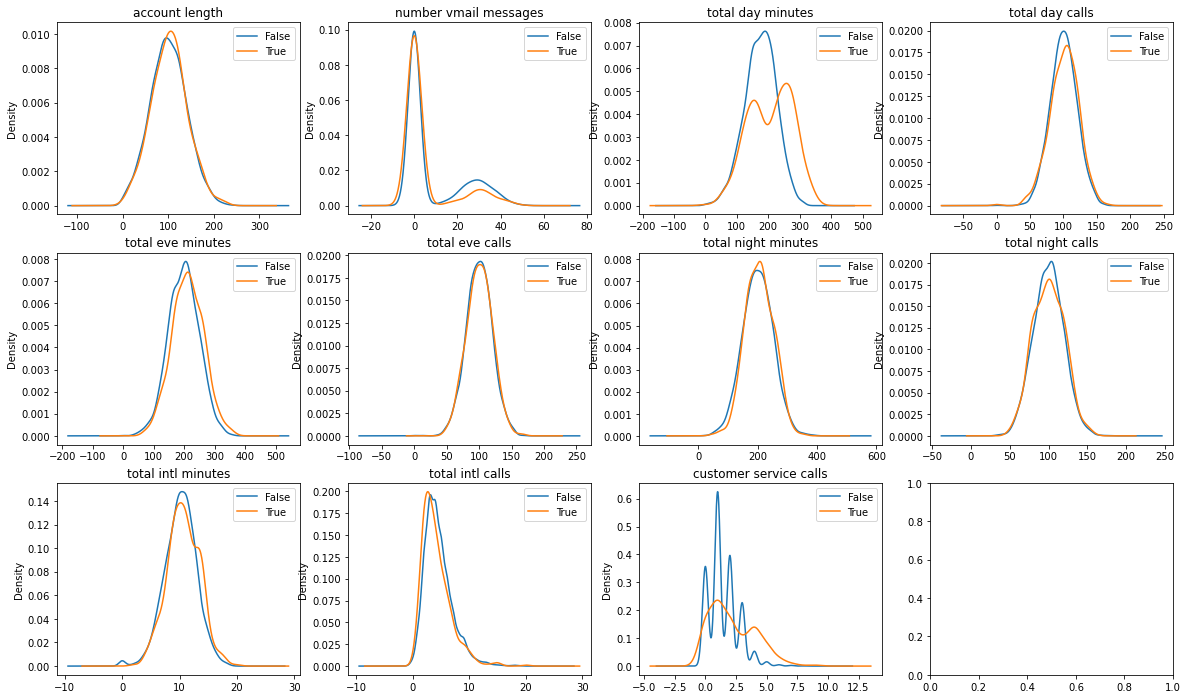

In [33]:
## PDF of continous variables and churn

fig, axs = plt.subplots(3, 4, figsize=(20, 12))
df.groupby(['churn'])['account length'].plot(kind='kde', legend=True, ax=axs[0,0]); axs[0,0].set_title('account length')
df.groupby(['churn'])['number vmail messages'].plot(kind='kde', legend=True, ax=axs[0,1]); axs[0,1].set_title('number vmail messages')
df.groupby(['churn'])['total day minutes'].plot(kind='kde', legend=True, ax=axs[0,2]); axs[0,2].set_title('total day minutes')
df.groupby(['churn'])['total day calls'].plot(kind='kde', legend=True, ax=axs[0,3]); axs[0,3].set_title('total day calls')
df.groupby(['churn'])['total eve minutes'].plot(kind='kde', legend=True, ax=axs[1,0]); axs[1,0].set_title('total eve minutes')
df.groupby(['churn'])['total eve calls'].plot(kind='kde', legend=True, ax=axs[1,1]); axs[1,1].set_title('total eve calls')
df.groupby(['churn'])['total night minutes'].plot(kind='kde', legend=True, ax=axs[1,2]); axs[1,2].set_title('total night minutes')
df.groupby(['churn'])['total night calls'].plot(kind='kde', legend=True, ax=axs[1,3]); axs[1,3].set_title('total night calls')
df.groupby(['churn'])['total intl minutes'].plot(kind='kde', legend=True, ax=axs[2,0]); axs[2,0].set_title('total intl minutes')
df.groupby(['churn'])['total intl calls'].plot(kind='kde', legend=True, ax=axs[2,1]); axs[2,1].set_title('total intl calls')
df.groupby(['churn'])['customer service calls'].plot(kind='kde', legend=True, ax=axs[2,2]); axs[2,2].set_title('customer service calls');
# Because the classes are imbalanced, I think 'kde' is more preferred than 'hist' here.


plt.savefig('continious.png')

/Users/B_A_S_i_C/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


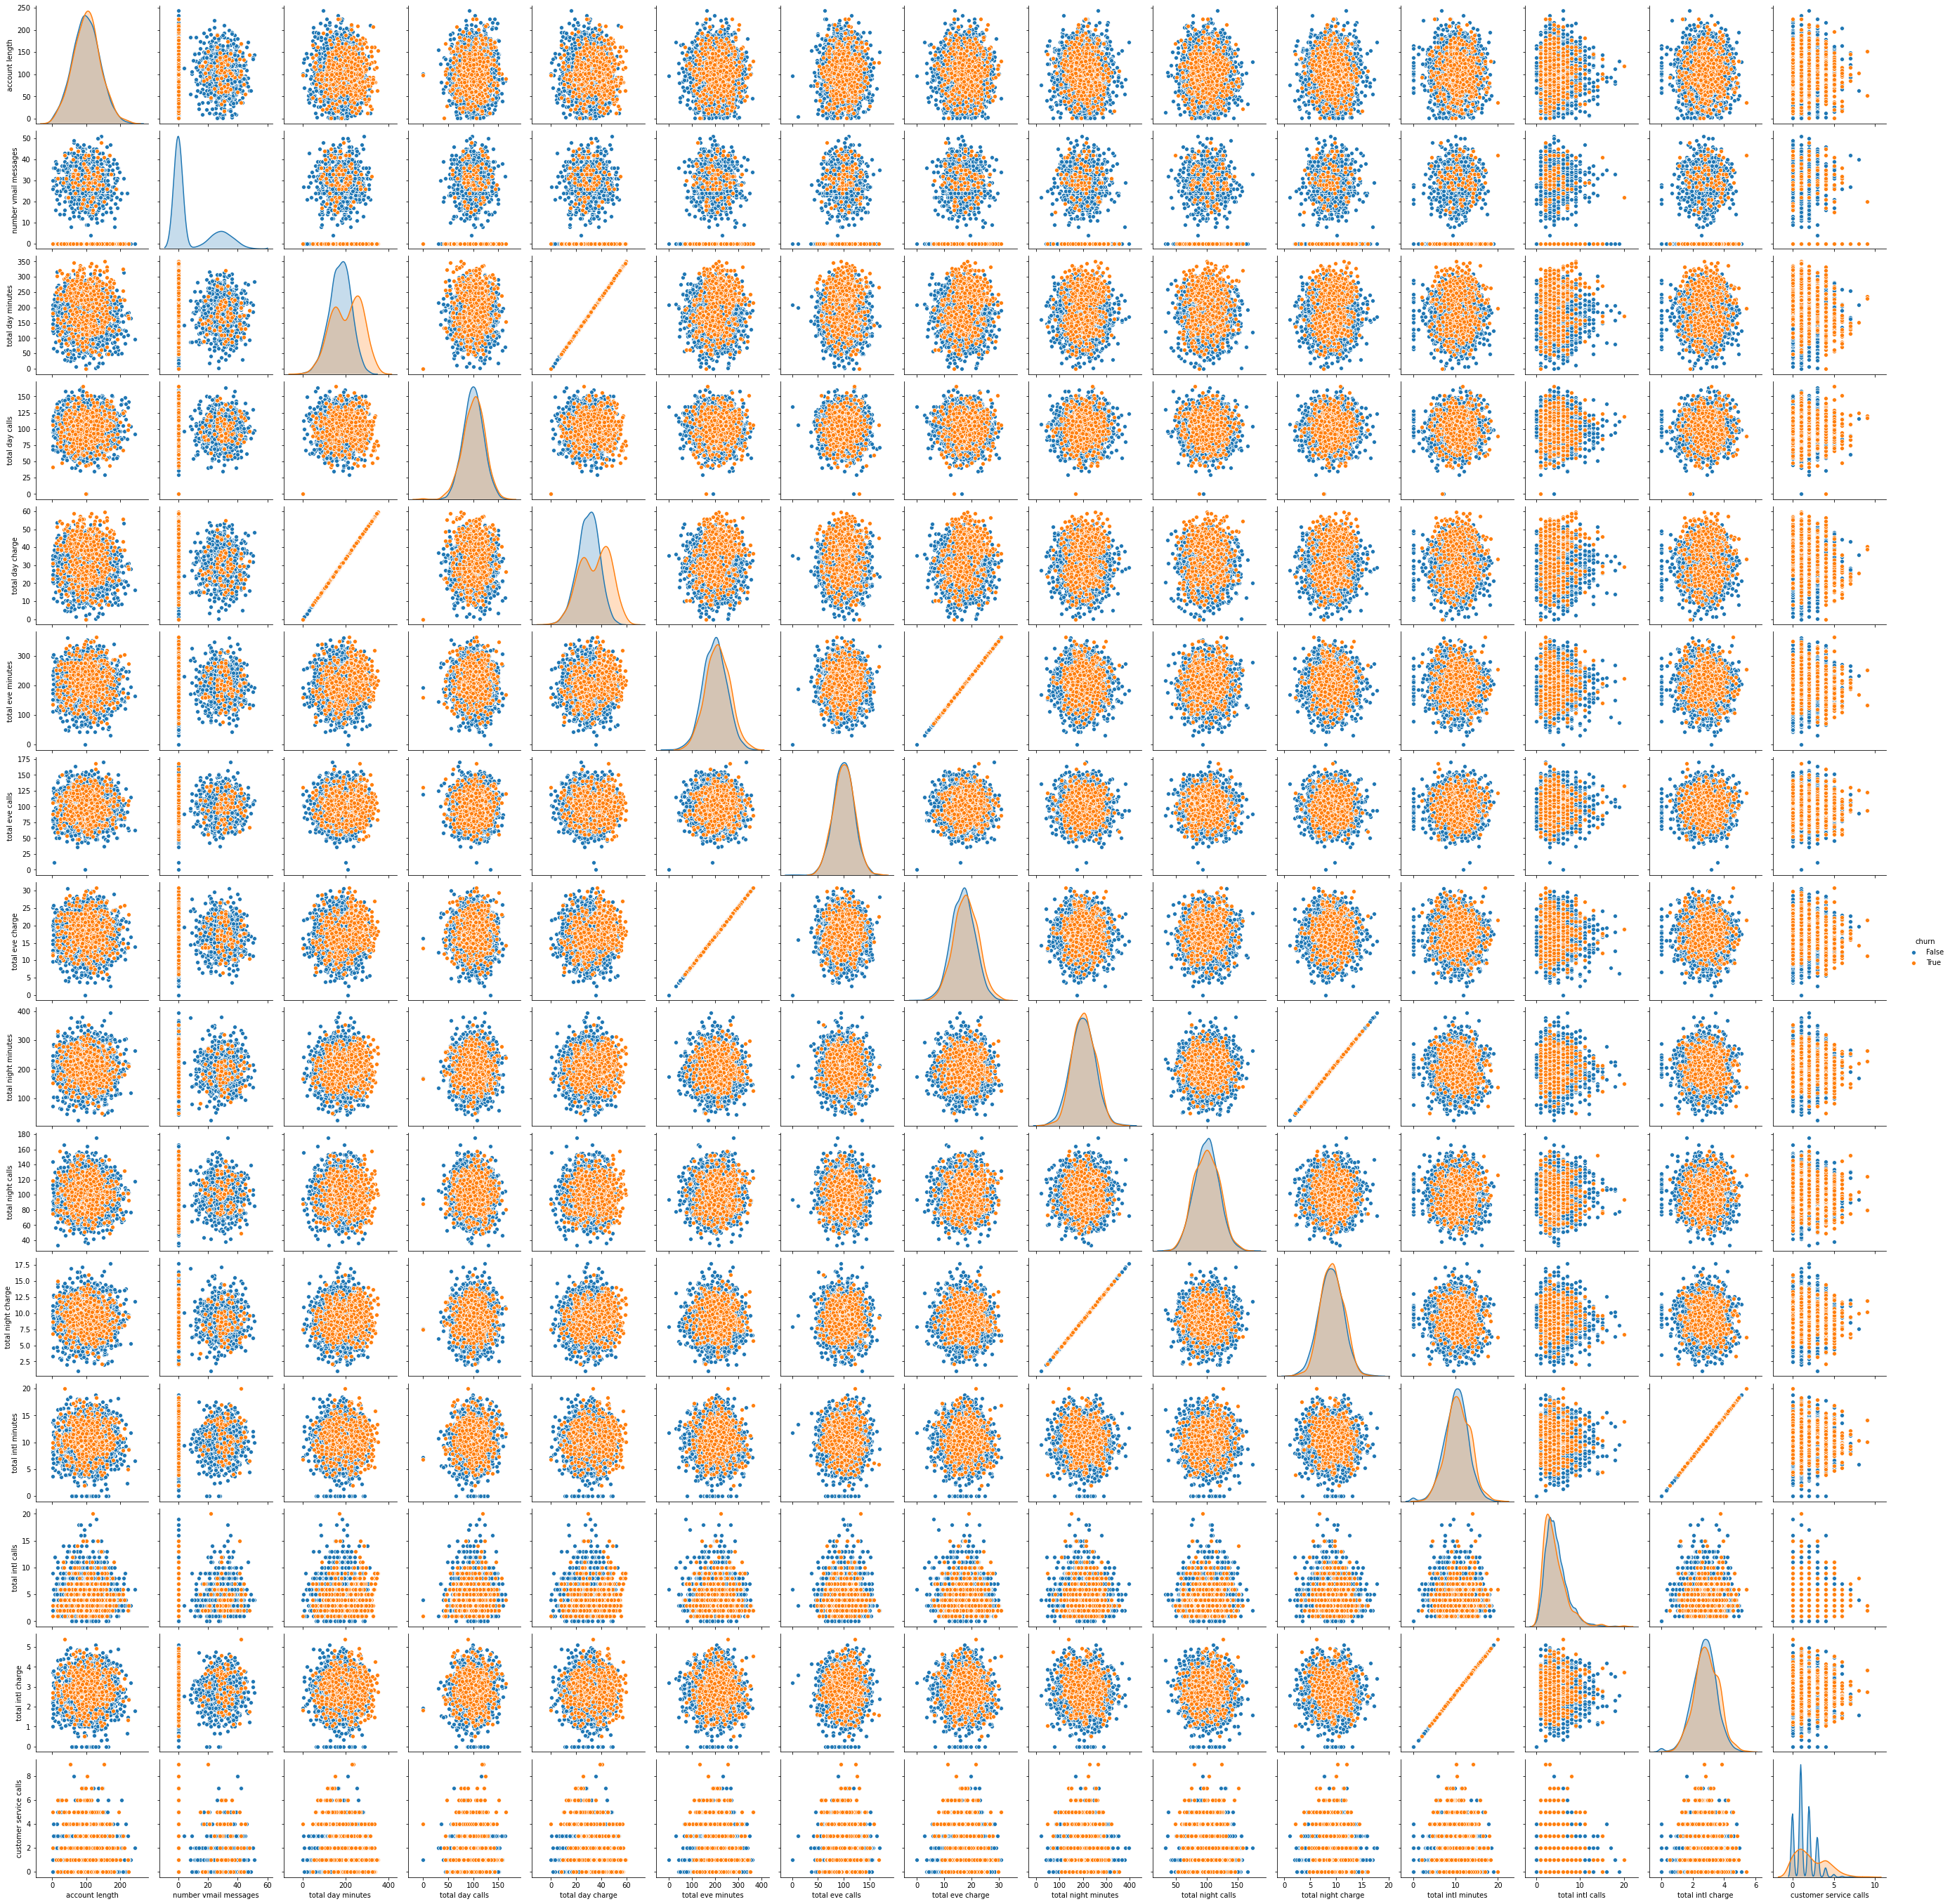

In [34]:
sns.pairplot(df[['churn', 'account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls']], hue="churn")
plt.savefig('pairplot.png')

Based on the pair plot we can see a lot of our continous values are overlapping with our target. Logistic Regression may not be the best as it will try to fit a bestline. However, we can still consider Logistic Regression as a starter or basline model in the beginning of the modeling phase. Further we should potentially consider the following models, Decision tree Random Forest.

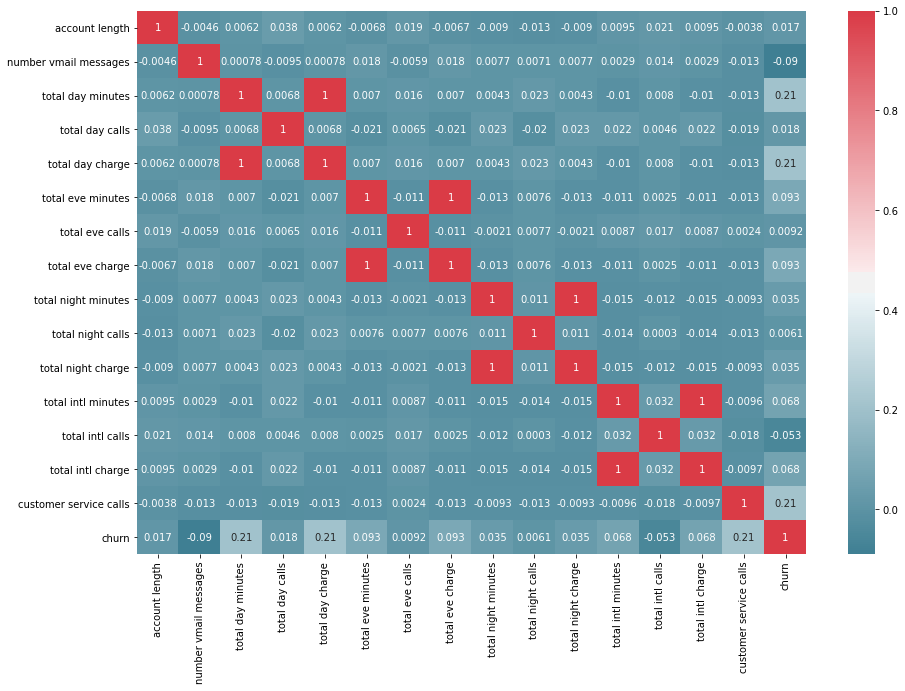

In [35]:
def correlation_heatmap(df1):
   _,ax=plt.subplots(figsize=(15,10))
   colormap=sns.diverging_palette(220,10,as_cmap=True)
   sns.heatmap(df.corr(),annot=True,cmap=colormap)
   
correlation_heatmap(df)

Total day minutes & total day charge - correlation 1

Total eve minutes & total eve charge - correlation 1

Total night minutes & total night charge - correlation 1

Total intl minutes & total intl charge - correlation 1

We can potentially drop some highly correlated countous variables. At this time I will create some features and then drop some of the high correlated variables

# Explorning categorical variables to continous variables


Text(16.424999999999997, 0.5, 'Number of customer support calls')

<Figure size 360x360 with 0 Axes>

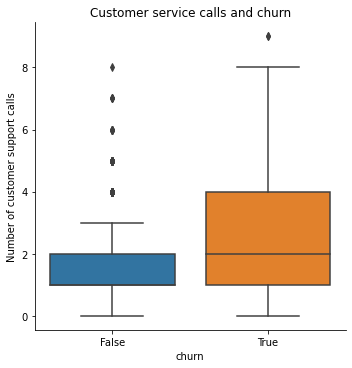

In [36]:
#Customer service call impact on churn
plt.figure(figsize=(5,5))
sns.catplot(data=df[['customer service calls','churn']],x='churn',y='customer service calls',kind="box")
plt.title("Customer service calls and churn")
plt.ylabel("Number of customer support calls")

In [37]:
## Total chnage for day, evening, and night by area code
df.groupby('area code').aggregate({'total day charge':'sum',
                                    'total eve charge':'sum',
                                    'total night charge':'sum'})

total day charge  total eve charge  total night charge
area code                                                        
408                25240.79          14337.60             7512.49
415                51092.06          28226.97            15046.92
510                25531.32          14374.87             7568.66

In [38]:
## Customers with/without international plans by area code
pd.crosstab(df['area code'],df['international plan'],margins=False) #margins=True to view the total

international plan    no  yes
area code                    
408                  767   71
415                 1505  150
510                  738  102

In [39]:
## frequency of international plans by area code
pd.crosstab(df['area code'],df['international plan'],margins=True, #margins=True to view the total
                                                    normalize = True)*100 #normalize to view by percentage

international plan         no       yes         All
area code                                          
408                 23.012301  2.130213   25.142514
415                 45.154515  4.500450   49.654965
510                 22.142214  3.060306   25.202520
All                 90.309031  9.690969  100.000000

In [40]:
pd.pivot_table(df,index=['churn','international plan'],
                    values = 'customer service calls',aggfunc = np.mean)

customer service calls
churn international plan                        
False no                                1.456081
      yes                               1.360215
True  no                                2.476879
      yes                               1.605839

# Feature Engineering

total minutes = adding minutes from day, evening and night

total charge = adding charge from day, evening and night

total calls = adding calls from day, evening and night

In [41]:
df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']
df['total charge'] = df['total day charge'] + df['total eve charge'] + df['total night charge']
df['total calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls']

df.head()

state  account length area code international plan voice mail plan  \
0    KS             128       415                 no             yes   
1    OH             107       415                 no             yes   
2    NJ             137       415                 no              no   
3    OH              84       408                yes              no   
4    OK              75       415                yes              no   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  ...  total night calls  \
0             45.07              197.4  ...                 91   
1             27.47              195.5  ...                103   
2             41.38              121.2  ...                104   
3             50.90               61.9  ...                 89   
4             28.34              148.3  ...                121   

   total night charge  total intl minutes  total intl calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   total intl charge  customer service calls  churn  total minutes  \
0               2.70                       1  False          707.2   
1               3.70                       1  False          611.5   
2               3.29                       0  False          527.2   
3               1.78                       2  False          558.2   
4               2.73                       3  False          501.9   

   total charge  total calls  
0         72.86          300  
1         55.54          329  
2         59.00          328  
3         65.02          248  
4         49.36          356  

[5 rows x 23 columns]

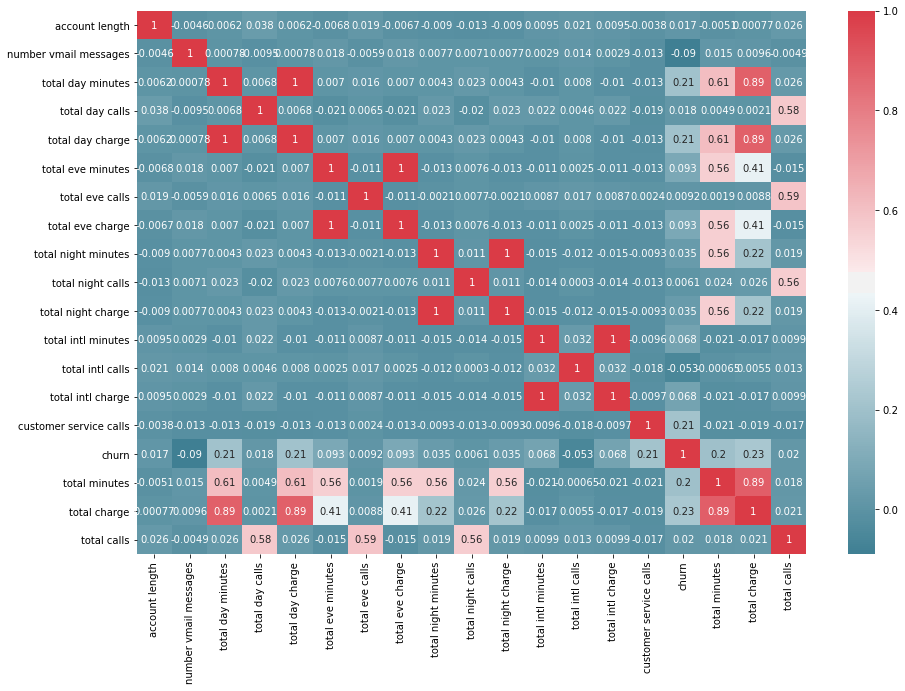

In [42]:
##Taking another gander of potential correlation
def correlation_heatmap(df1):
   _,ax=plt.subplots(figsize=(15,10))
   colormap=sns.diverging_palette(220,10,as_cmap=True)
   sns.heatmap(df.corr(),annot=True,cmap=colormap)
   
correlation_heatmap(df)

In [43]:
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn', 'total minutes', 'total charge', 'total calls'],
      dtype='object')

In [44]:
# Dropping som features that are highly correlated

df = df.drop(['total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge'], axis = 1)

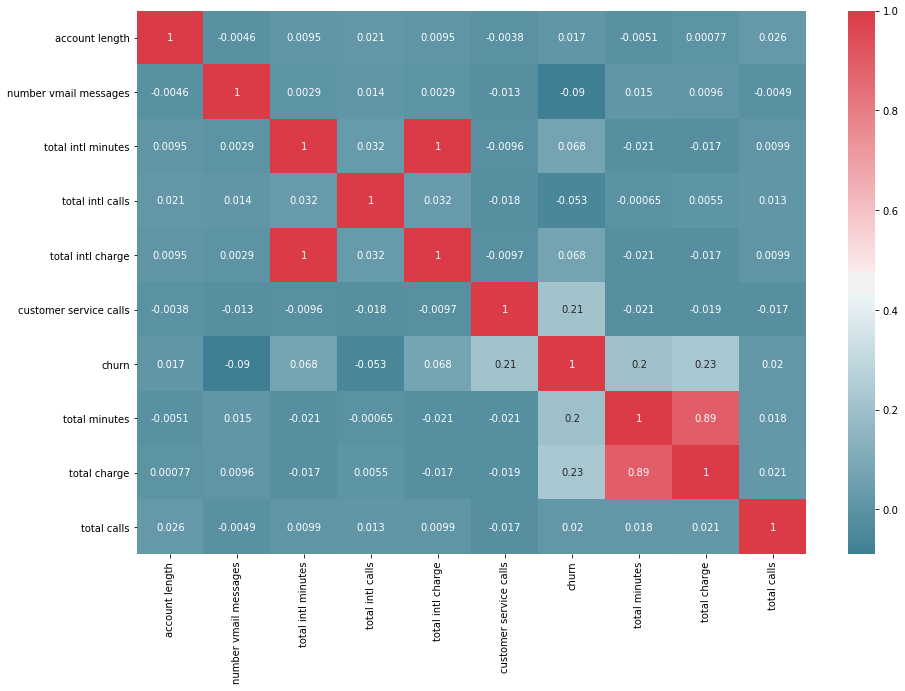

In [45]:
##Taking another gander of potential correlation

def correlation_heatmap(df1):
   _,ax=plt.subplots(figsize=(15,10))
   colormap=sns.diverging_palette(220,10,as_cmap=True)
   sns.heatmap(df.corr(),annot=True,cmap=colormap)
   
correlation_heatmap(df)

# Preprocessing Data for Modeling

In [46]:
# converting all strings and booleans to 0 and 1

df.replace(False, 0, inplace = True)
df.replace('no', 0, inplace = True)

df.replace(True, 1, inplace = True)
df.replace('yes', 1, inplace = True)

In [47]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [48]:
df.dtypes

state                      object
account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                     float64
total minutes             float64
total charge              float64
total calls                 int64
dtype: object

In [49]:
## using encoder to dummy out categorical data

dummy_df = pd.get_dummies(df, columns=['state', 'area code'], drop_first = True)
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   int64  
 2   voice mail plan         3333 non-null   int64  
 3   number vmail messages   3333 non-null   int64  
 4   total intl minutes      3333 non-null   float64
 5   total intl calls        3333 non-null   int64  
 6   total intl charge       3333 non-null   float64
 7   customer service calls  3333 non-null   int64  
 8   churn                   3333 non-null   float64
 9   total minutes           3333 non-null   float64
 10  total charge            3333 non-null   float64
 11  total calls             3333 non-null   int64  
 12  state_AL                3333 non-null   uint8  
 13  state_AR                3333 non-null   uint8  
 14  state_AZ                3333 non-null   

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

Scaling and processing the data for modeling

In [51]:
X = dummy_df.drop(columns='churn')
y = dummy_df.churn

In [52]:
y.value_counts()

0.0    2850
1.0     483
Name: churn, dtype: int64

We will need to be prepared to address the class imbalance

Text(0.5, 1.0, 'Class Distribution Before Resampling')

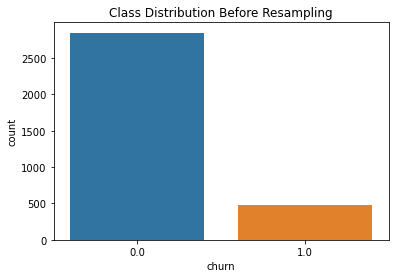

In [53]:
# handling the class imbalance by resampling upsampling from the majority class

sns.countplot('churn', data=dummy_df).set_title('Class Distribution Before Resampling')

In [54]:
false = dummy_df[dummy_df.churn == 0]
true = dummy_df[dummy_df.churn == 1]

In [55]:
print(len(false),len(true))

2850 483


In [56]:
true_upsampled = true.sample(n=len(false), replace=True, random_state=42)
print(len(true_upsampled))

2850


In [57]:
churn_upsampled = false.append(true_upsampled).reset_index(drop=True)

Text(0.5, 1.0, 'Class Distribution After Resampling')

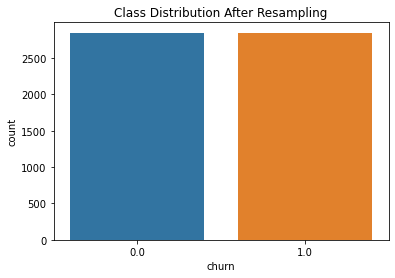

In [58]:
sns.countplot('churn', data=churn_upsampled).set_title('Class Distribution After Resampling')

In [59]:
churn_upsampled

account length  international plan  voice mail plan  \
0                128                   0                1   
1                107                   0                1   
2                137                   0                0   
3                 84                   1                0   
4                 75                   1                0   
...              ...                 ...              ...   
5695             121                   1                0   
5696              37                   0                0   
5697              98                   0                0   
5698             161                   0                0   
5699             122                   0                1   

      number vmail messages  total intl minutes  total intl calls  \
0                        25                10.0                 3   
1                        26                13.7                 3   
2                         0                12.2                 5   
3                         0                 6.6                 7   
4                         0                10.1                 3   
...                     ...                 ...               ...   
5695                      0                13.4                 1   
5696                      0                 8.9                 4   
5697                      0                12.4                 2   
5698                      0                13.4                 4   
5699                     33                13.5                 3   

      total intl charge  customer service calls  churn  total minutes  ...  \
0                  2.70                       1    0.0          707.2  ...   
1                  3.70                       1    0.0          611.5  ...   
2                  3.29                       0    0.0          527.2  ...   
3                  1.78                       2    0.0          558.2  ...   
4                  2.73                       3    0.0          501.9  ...   
...                 ...                     ...    ...            ...  ...   
5695               3.62                       3    1.0          502.7  ...   
5696               2.40                       2    1.0          708.6  ...   
5697               3.35                       0    1.0          717.7  ...   
5698               3.62                       4    1.0          467.6  ...   
5699               3.65                       1    1.0          587.7  ...   

      state_TX  state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  \
0            0         0         0         0         0         0         0   
1            0         0         0         0         0         0         0   
2            0         0         0         0         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         0         0         0         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
5695         0         0         0         0         0         0         0   
5696         0         0         0         0         0         0         0   
5697         1         0         0         0         0         0         0   
5698         0         0         0         0         0         0         1   
5699         0         0         0         0         0         0         0   

      state_WY  area code_415  area code_510  
0            0              1              0  
1            0              1              0  
2            0              1              0  
3            0              0              0  
4            0              1              0  
...        ...            ...            ...  
5695         0              0              0  
5696         0              0              1  
5697         0              1              0  
5698         0              1              0  
5699         0              0              0  

[5700

In [60]:
X = churn_upsampled.drop(columns='churn')
y = churn_upsampled.churn

# Baseline

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold,RepeatedStratifiedKFold,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

## Scaling data

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [63]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(5700, 63)
(4560, 63)
(1140, 63)
(5700,)
(4560,)
(1140,)


In [64]:
# Scaling the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
print(X_train)

[[ 0.27153402 -0.44968278 -0.54694177 ... -0.15795388  1.01413498
  -0.5797137 ]
 [-0.5588952  -0.44968278 -0.54694177 ... -0.15795388  1.01413498
  -0.5797137 ]
 [-1.26350181 -0.44968278 -0.54694177 ... -0.15795388 -0.98606204
  -0.5797137 ]
 ...
 [-0.05560476 -0.44968278  1.8283482  ... -0.15795388  1.01413498
  -0.5797137 ]
 [ 0.42252115  2.22378983 -0.54694177 ... -0.15795388 -0.98606204
  -0.5797137 ]
 [-1.11251468 -0.44968278 -0.54694177 ... -0.15795388  1.01413498
  -0.5797137 ]]


# Metric Focus

We will focus on False Negatives as we want to account for all customers who curn and not overlook customers wom were miss catrgozed as no churning

Recall will be or metric emphasis as it is the more valuable indicator in understanding churn

## Logistic Reg

In [66]:
#Logistic regression
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred_logreg = logreg.predict(X_test)

In [67]:
accur = accuracy_score(y_pred_logreg, y_test)
print(accur)

0.7640350877192983


In [68]:
recall = recall_score(y_pred_logreg, y_test)
print(recall)

0.7508474576271187


In [69]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76       575
         1.0       0.75      0.78      0.77       565

    accuracy                           0.76      1140
   macro avg       0.76      0.76      0.76      1140
weighted avg       0.76      0.76      0.76      1140



In [70]:
from sklearn import metrics
cnf_matrix_logreg = metrics.confusion_matrix(y_test, y_pred_logreg)
cnf_matrix_logreg

array([[428, 147],
       [122, 443]])

Text(0.5, 257.44, 'Predicted label')

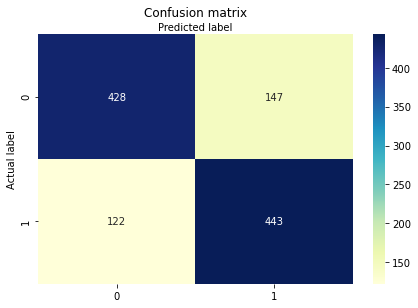

In [71]:
import numpy as np
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logreg), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [72]:
# Perfomance analysis of the test data
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision:",metrics.precision_score(y_test, y_pred_logreg))
print("Recall:",metrics.recall_score(y_test, y_pred_logreg))

Accuracy: 0.7640350877192983
Precision: 0.7508474576271187
Recall: 0.784070796460177


In [73]:
# performance analysis on training data
y_pred_logreg_training = logreg.predict(X_train)
print("Accuracy : ",metrics.accuracy_score(y_train,y_pred_logreg_training))
print("Precision : ",metrics.precision_score(y_train,y_pred_logreg_training))
print("Recall : ",metrics.recall_score(y_train,y_pred_logreg_training))


Accuracy :  0.774780701754386
Precision :  0.7734782608695652
Recall :  0.7785557986870897


Very good baseline in-terms of Recall at 78.4%

## Decision Tree

In [74]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

accur = accuracy_score(y_pred_dt, y_test)
print(accur)

0.9254385964912281


In [75]:
recall = recall_score(y_test, y_pred_dt)
print(recall)

0.8584070796460177


In [76]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       575
         1.0       0.99      0.86      0.92       565

    accuracy                           0.93      1140
   macro avg       0.93      0.92      0.93      1140
weighted avg       0.93      0.93      0.93      1140



In [77]:
cnf_matrix_dt = metrics.confusion_matrix(y_test, y_pred_dt)
cnf_matrix_dt

array([[570,   5],
       [ 80, 485]])

Text(0.5, 257.44, 'Predicted label')

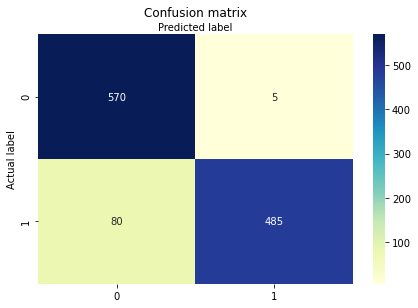

In [78]:
import numpy as np
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_dt), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [79]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precision:",metrics.precision_score(y_test, y_pred_dt))
print("Recall:",metrics.recall_score(y_test, y_pred_dt))

Accuracy: 0.9254385964912281
Precision: 0.9897959183673469
Recall: 0.8584070796460177


In [80]:
# performance analysis on training data
y_pred_dt_training = dt.predict(X_train)
print("Accuracy : ",metrics.accuracy_score(y_train,y_pred_dt_training))
print("Precision : ",metrics.precision_score(y_train,y_pred_dt_training))
print("Recall : ",metrics.recall_score(y_train,y_pred_dt_training))


Accuracy :  0.9296052631578947
Precision :  0.9964610717896866
Recall :  0.862582056892779


The scores have imporved with just a base untuned decision tree. As the results in recall and percision. We could consider that a tree-base model will be a good fit to move forward with

## Random Forest


In [81]:
from sklearn.ensemble import RandomForestClassifier
rf  = RandomForestClassifier(n_estimators = 100, max_depth= 5)
rf.fit(X_train, y_train)

# prediction
y_pred_rf = rf.predict(X_test)



In [82]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91       575
         1.0       0.93      0.87      0.90       565

    accuracy                           0.90      1140
   macro avg       0.90      0.90      0.90      1140
weighted avg       0.90      0.90      0.90      1140



In [83]:
recall = recall_score(y_test, y_pred_rf)
print(recall)

0.8654867256637168


In [84]:
cnf_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)
cnf_matrix_rf

array([[540,  35],
       [ 76, 489]])

Text(0.5, 257.44, 'Predicted label')

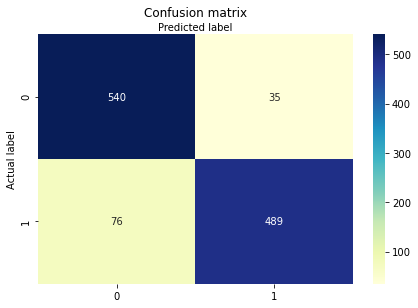

In [85]:
import numpy as np
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [86]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:",metrics.precision_score(y_test, y_pred_rf))
print("Recall:",metrics.recall_score(y_test, y_pred_rf))

Accuracy: 0.9026315789473685
Precision: 0.933206106870229
Recall: 0.8654867256637168


In [87]:
# performance analysis on training data
y_pred_rf_training = dt.predict(X_train)
print("Accuracy : ",metrics.accuracy_score(y_train,y_pred_rf_training))
print("Precision : ",metrics.precision_score(y_train,y_pred_rf_training))
print("Recall : ",metrics.recall_score(y_train,y_pred_rf_training))

Accuracy :  0.9296052631578947
Precision :  0.9964610717896866
Recall :  0.862582056892779


The random forest models seems to be performing slightly better. However, we will try some hyperparamter tuning to see if there are any performance increases

# Hyperparamater Tuning with GridSearchCV 

## Logistic regression with GridSearchCV

In [88]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
}

grid = GridSearchCV(estimator=LogisticRegression(),
                    param_grid=param_grid,
                    scoring='recall',
                    verbose=1,
                    n_jobs=-1)

result = grid.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.6s finished


In [89]:
print(result.best_score_)
print(result.best_params_)

0.7776805251641138
{'C': 10, 'fit_intercept': True, 'penalty': 'l2'}


In [90]:
print(result.best_estimator_)

LogisticRegression(C=10)


In [91]:
# Applying hyper-params to my logistic regression model
logreg_tuned = LogisticRegression()
logreg_tuned = LogisticRegression(penalty='l2', fit_intercept=True, C=10)
logreg_tuned.fit(X_train, y_train)


y_pred_logreg_tuned = logreg.predict(X_test)

In [92]:
print(classification_report(y_test, y_pred_logreg_tuned))

              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76       575
         1.0       0.75      0.78      0.77       565

    accuracy                           0.76      1140
   macro avg       0.76      0.76      0.76      1140
weighted avg       0.76      0.76      0.76      1140



In [93]:
# Perfomance analysis of the test data
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg_tuned))
print("Precision:",metrics.precision_score(y_test, y_pred_logreg_tuned))
print("Recall:",metrics.recall_score(y_test, y_pred_logreg_tuned))

Accuracy: 0.7640350877192983
Precision: 0.7508474576271187
Recall: 0.784070796460177


In [94]:
cnf_matrix_logreg_tuned = metrics.confusion_matrix(y_test, y_pred_logreg_tuned)
cnf_matrix_logreg_tuned

array([[428, 147],
       [122, 443]])

Text(0.5, 257.44, 'Predicted label')

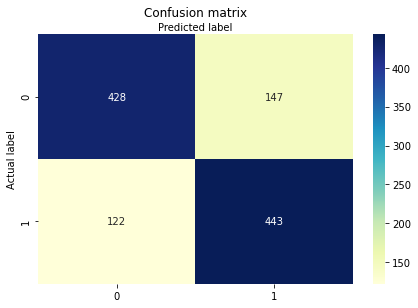

In [95]:
import numpy as np
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logreg_tuned), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

There was no difference in terms of the metrics when we used the gridsearchCV hyper paramters from our inital untuned logistic regression.

## Decision Tree with with GridSearchCV

In [96]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1,10),
    'min_samples_split' : range(1,10),
    'min_samples_leaf' : range(1,5)
}

grid_dt = GridSearchCV(estimator=dt,
                    param_grid=param_grid_dt,
                    scoring='recall',
                    verbose=1,
                    n_jobs=-1)

result_dt = grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1344 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:   35.7s finished


In [97]:
print(result_dt.best_score_)
print(result_dt.best_params_)

0.8923413566739606
{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [98]:
dt_tuned = DecisionTreeClassifier(max_depth = 9)
dt_tuned.fit(X_train, y_train)
y_pred_dt_tuned = dt_tuned.predict(X_test)





In [99]:
print(classification_report(y_test, y_pred_dt_tuned))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       575
         1.0       0.99      0.87      0.93       565

    accuracy                           0.93      1140
   macro avg       0.94      0.93      0.93      1140
weighted avg       0.94      0.93      0.93      1140



In [100]:
cnf_matrix_dt_tuned = metrics.confusion_matrix(y_test, y_pred_dt_tuned)
cnf_matrix_dt_tuned

array([[568,   7],
       [ 71, 494]])

Text(0.5, 257.44, 'Predicted label')

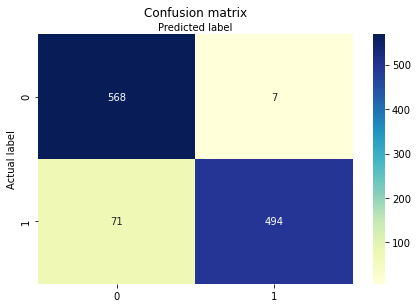

In [101]:
import numpy as np
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_dt_tuned), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Sklearn Model Comparison

In [102]:
#Comparison of base model performance

print('Logistic Regression:\n {}\n'.format(classification_report(y_test, y_pred_logreg)))
print('Decision Tree:\n {}\n'.format(classification_report(y_test, y_pred_dt)))
print('Random Forest:\n {}\n'.format(classification_report(y_test, y_pred_rf)))

Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.78      0.74      0.76       575
         1.0       0.75      0.78      0.77       565

    accuracy                           0.76      1140
   macro avg       0.76      0.76      0.76      1140
weighted avg       0.76      0.76      0.76      1140


Decision Tree:
               precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       575
         1.0       0.99      0.86      0.92       565

    accuracy                           0.93      1140
   macro avg       0.93      0.92      0.93      1140
weighted avg       0.93      0.93      0.93      1140


Random Forest:
               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91       575
         1.0       0.93      0.87      0.90       565

    accuracy                           0.90      1140
   macro avg       0.90      0.90      0.90      1140
weighted avg      

In [103]:
# Comparison of models tuned with Gridsearch CV

print('Logistic Regression Tuned:\n {}\n'.format(classification_report(y_test, y_pred_logreg_tuned)))
print('Decision Tree Tuned:\n {}\n'.format(classification_report(y_test, y_pred_dt_tuned)))

Logistic Regression Tuned:
               precision    recall  f1-score   support

         0.0       0.78      0.74      0.76       575
         1.0       0.75      0.78      0.77       565

    accuracy                           0.76      1140
   macro avg       0.76      0.76      0.76      1140
weighted avg       0.76      0.76      0.76      1140


Decision Tree Tuned:
               precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       575
         1.0       0.99      0.87      0.93       565

    accuracy                           0.93      1140
   macro avg       0.94      0.93      0.93      1140
weighted avg       0.94      0.93      0.93      1140




The tuned decision tree model had the best performance overall. However, with a bit more data and time, we could further tune paramters to increase model performance. Yet, with such high score there could be some potential data leakage. In furtherance, this only a phase one iteration of the modeling process to present to our stakeholders. 

# PyCaret

Below is a package called PyCaret. It is an all in one machine learning pipline. The ability to save time and do optimizations quicly will cut cost on building each various model from scrating. However, in this first iteration i'd like to use it as a model comparision from our hand coded verions above.


In [104]:
# Pycaret
from pycaret.classification import *

In [105]:
#reg = setup(data=one_hot_df, target='churn' )


## Preprocssing
clf1 = setup(data = churn_upsampled, target = 'churn')

In [ ]:
## Model Comparison
best_model = compare_models(sort = 'Recall')

IntProgress(value=0, description='Processing: ', max=79)

Initiated  . . . . . . . . . . . . . . . . . .                07:42:17
Status     . . . . . . . . . . . . . . . . . .        Fitting 10 Folds
Estimator  . . . . . . . . . . . . . . . . . .  Extra Trees Classifier

In [ ]:
print(best_model)

In [ ]:
#Model creation and 10 fold CV
dt = create_model('dt')

In [ ]:
#hyperprams
print(dt)

In [ ]:
# Tuned model with 10 fold CV 
tuned_dt = tune_model(dt)

In [ ]:
# Hyperprams of tuned model
print(tuned_dt)

In [ ]:
# 
plot_model(dt, plot = 'auc')

In [ ]:
plot_model(dt, plot='feature')

In [ ]:
plot_model(tuned_dt, plot='feature')


# Recommendation

* Based on the performance of the decision tree we were able to extract the following

1) Customer Service needs to focus it's efforts in reducing incoming call volume and may need a system to better enhance the customer experience

2) The implementation of CRM (customer record management) system to better log/survey the voice of the customer experience and for further analysis 

3) Sales needs to increase it effort in signing up new customers with international plans 

4) Working with marketing in understanding new product offerings and customer segmentation

5) Competitive analysis of other non-contractural mobile telecom services. 

6) Forecasting trends from other companies/industries who have subscription based business model

# Next Steps

1) Value: time is money and the application of Pycaret will help greatly in reducing time choosing a model and testing. Although the cost of computing power is a bit intensive this package has the ability greatly save time in the modeling and optimization process.

2) Connecting: Connecting with stakeholders to further understand the customer experience

3) Storytelling: Underdtanding the customer journey and voice, this can be done via customer service enhancement and implemntation of both CRM (customer record managment) and KYC (know your customer) systems. 

4) Compeitiion: Understanding industry competitors and forecasting telcom trends

5) Capture: Capture more revelant and up-to-date data, gather more data from business that are successful within the subscription based business model

6) Versioning: testing noe models, enhancements, and connecting to internal stakeholders (business and tech) to further optimize or navigate the business requirements